In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
np.random.seed(12)

# Generate Data

In [10]:


rad = 10
thk = 5
sep = 5

N_class = 1000


def get_half(center_x=0, center_y=0, rad=10, thk=5):
    R_data = np.random.rand(N_class) * thk + rad
    Theta_data = np.random.rand(N_class) * np.pi

    X = center_x + R_data * np.cos(Theta_data)
    Y = center_y + R_data * np.sin(Theta_data)
    return X, Y

# top half
X_p, Y_p = get_half(0, 0)
Y_p = Y_p + sep / 2

# bottom half
X_n, Y_n = get_half(12.5, 0)
Y_n = -Y_n - sep / 2



In [11]:
XY_p = np.stack((X_p, Y_p), axis=1)
XY_n = np.stack((X_n, Y_n), axis=1)

Data = np.concatenate((XY_p, XY_n), axis=0)

# augment with 1 in the beginning
Data_aug = np.concatenate((np.ones(len(Data)).reshape(-1, 1), Data), axis=1)
Label = np.concatenate((np.ones(N_class), -np.ones(N_class)))


# Run the PLA

iteration:  6
w:  [ 2.         -6.27971821 40.86069598]


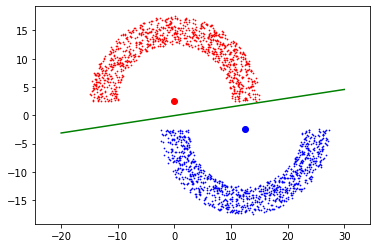

In [12]:

# PLA algorithm

w = np.zeros(3)  # initial weight

iteration = 0
while True:
    h = (np.dot(Data_aug, w) > 0) * 2 - 1

    # get misclassified data
    misclassified_index = (h != Label).nonzero()[0]

    if len(misclassified_index) == 0:
        # PLA terminate
        break

    # randomly pick one
    index_rand = np.random.choice(misclassified_index)

    # update w
    w = w + Label[index_rand] * Data_aug[index_rand]
    
    iteration += 1

print('iteration: ', iteration)
print('w: ', w)


plt.scatter(X_p, Y_p, color='red', s=0.5)
plt.scatter(X_n, Y_n, color='blue', s=0.5)

# center
plt.scatter(0, sep/2, color='red')
plt.scatter(12.5, -sep/2, color='blue')

plt.axis('equal')

# Plot the data and hypothesis
x_pla = np.linspace(-20, 30, 1000)
y_pla = -(w[0] + w[1] * x_pla) / w[2]
plt.plot(x_pla, y_pla, color='green')


# Linear regression

w_lin:  [ 0.06774333 -0.00982737  0.07831077]


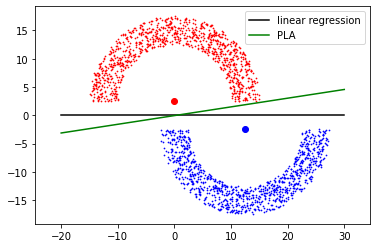

In [13]:
x_pinv = np.linalg.inv(Data_aug.transpose() @ Data_aug) @ Data_aug.transpose()
w_lin = x_pinv @ Label

print('w_lin: ', w_lin)


plt.scatter(X_p, Y_p, color='red', s=0.5)
plt.scatter(X_n, Y_n, color='blue', s=0.5)

# center
plt.scatter(0, sep/2, color='red')
plt.scatter(12.5, -sep/2, color='blue')

plt.axis('equal')

# Plot the data and hypothesis: Linear regression
x_pla = np.linspace(-20, 30, 1000)
y_pla = -(w_lin[0] + w_lin[1] * x_pla) / w[2]
plt.plot(x_pla, y_pla, color='black', label='linear regression')

# Plot the data and hypothesis: PLA
y_pla = -(w[0] + w[1] * x_pla) / w[2]
plt.plot(x_pla, y_pla, color='green', label='PLA')

plt.legend()